<a href="https://colab.research.google.com/github/YokoFurukawa456/HW-for-J124/blob/main/Duolingo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [4]:
survey_data = pd.read_csv("survey_data.csv")
survey_app_usage = pd.read_csv("survey_users_app_usage.csv")

This file contains the following three parts
- Data Cleaning
- EDA (Visualization)
- User Segmentation

Clarification: The data I used to back up my user segmentation proposal is mainly in the **User Segmentation** section, and I used the EDA section to explore possible trends in the dataset.

# Cleaning

In [123]:
survey_data['other_resources'].fillna("N/A", inplace=True)
survey_data['primary_language_motivation_followup'].fillna("N/A", inplace=True)
survey_data['annual_income'].fillna("unknown", inplace=True)

def commitment_score(text):
  if text == "I'm not at all committed to learning this language.":
    return 1
  elif text == "I'm slightly committed to learning this language.":
    return 2
  elif text == "I'm moderately committed to learning this language.":
    return 3
  elif text == "I'm very committed to learning this language.":
    return 4
  elif text == "I'm extremely committed to learning this language.":
    return 5
  else:
    return np.nan

survey_data['commitment_score'] = survey_data['primary_language_commitment'].apply(commitment_score)
survey_data

/tmp/ipython-input-313154782.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  survey_data['other_resources'].fillna("N/A", inplace=True)
/tmp/ipython-input-313154782.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

,user_id,age,annual_income,country,duolingo_platform,duolingo_subscriber,duolingo_usage,employment_status,future_contact,gender,other_resources,primary_language_commitment,primary_language_review,primary_language_motivation,primary_language_motivation_followup,primary_language_proficiency,student,survey_complete,time_spent_seconds,commitment_score
0,35c9fc6e72c911e99681dca9049399ef,18-34,"$26,000 - $75,000",JP,Android phone or tablet,"No, I have never paid for Duolingo Plus",Daily,Employed full-time,Yes,Male,"Stories/novels/children's books,Movies/TV Shows",I'm very committed to learning this language.,I am using Duolingo to review a language I've ...,I like to learn new languages,"I want to learn as many languages as I can,Oth...",Advanced,Not currently a student,1,193,4.0
1,35c9fdde72c911e98630dca9049399ef,18-34,"$26,000 - $75,000",JP,iPhone or iPad,"No, I have never paid for Duolingo Plus",Weekly,Employed full-time,Yes,Male,N/A,I'm slightly committed to learning this language.,I am using Duolingo to review a language I've ...,I need to be able to speak the local language ...,"I am an immigrant,I am a refugee",Intermediate,Not currently a student,1,139,2.0
2,35c9feb072c911e9ab4cdca9049399ef,18-34,"$76,000 - $150,000",JP,iPhone or iPad,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Yes,Male,N/A,I'm moderately committed to learning this lang...,I am using Duolingo to review a language I've ...,I want to connect with my heritage or identity,N/A,Beginner,Not currently a student,1,119,3.0
3,35c9ff7072c911e9900ddca9049399ef,18-34,"$76,000 - $150,000",JP,iPhone or iPad,"No, but I have previously paid for Duolingo Plus",Daily,Employed full-time,Yes,Female,Other apps,I'm very committed to learning this language.,I am using Duolingo to learn this language for...,I am preparing for a trip,I want to learn some basics in the local langu...,Intermediate,Not currently a student,1,229,4.0
4,35ca002672c911e99effdca9049399ef,35 - 54,"$76,000 - $150,000",JP,Android phone or tablet,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Yes,Male,N/A,I'm very committed to learning this language.,I am using Duolingo to learn this language for...,I want to connect with my heritage or identity,N/A,Intermediate,Not currently a student,1,157,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6182,35cfd79c72c911e9a397dca9049399ef,35 - 54,"$26,000 - $75,000",GB,iPhone or iPad,"No, I have never paid for Duolingo Plus",Daily,Employed full-time,Yes,Male,Online language class,I'm very committed to learning this language.,I am using Duolingo to learn this language for...,I want to connect with my heritage or identity,N/A,Beginner,Not currently a student,1,-293,4.0
6183,35d2f08a72c911e9b7dbdca9049399ef,35 - 54,unknown,CO,Android phone or tablet,"No, I have never paid for Duolingo Plus",Daily,Employed full-time,Yes,Male,N/A,I'm very committed to learning this language.,I am using Duolingo to review a language I've ...,I like to learn new languages,It's been a lifelong goal to learn this langua...,Beginner,Not currently a student,1,-222,4.0
6184,35cd250f72c911e9b9a1dca9049399ef,55 - 74,"$151,000 or more",GB,iPhone or iPad,"No, I have never paid for Duolingo Plus",I don't use Duolingo,Employed full-time,No,Female,"Stories/novels/children's books,Movies/TV Show...",I'm extremely committed to learning this langu...,I am using Duolingo to review a language I've ...,I want to advance professionally or economically,Learning this language will help me get a bett...,Beginner,Full-time student,1,-114,5.0
6185,35cf7a1772c911e9b029dca9049399ef,55 - 74,"$26,000 - $75,000",FR,Android phone or tablet,"Yes, I currently pay for Duolingo Plus",Daily,Retired,No,Male,N/A,I'm very committed to learning this language.,I am using Duolingo to review a language I've ...,I want to keep my brain healthy,N/A,Beginner,Not currently a student,1,-284,4.0


In [150]:
survey_app_usage['daily_goal'].fillna(0, inplace=True)
survey_app_usage['highest_course_progress']=survey_app_usage['highest_course_progress'].apply(lambda x: x if x >= 0 else np.nan)
# Then fill with median
survey_app_usage['highest_course_progress'].fillna(survey_app_usage['highest_course_progress'].median(), inplace=True)
survey_app_usage['highest_crown_count'].fillna(survey_app_usage['highest_crown_count'].median(), inplace=True)
survey_app_usage['longest_streak']=survey_app_usage['highest_course_progress'].apply(lambda x: x if x != 6000 else np.nan)
survey_app_usage['longest_streak'].fillna(survey_app_usage['highest_crown_count'].median(), inplace=True)
survey_app_usage

/tmp/ipython-input-284901451.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  survey_app_usage['daily_goal'].fillna(0, inplace=True)
/tmp/ipython-input-284901451.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

,user_id,duolingo_start_date,daily_goal,highest_course_progress,took_placement_test,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform,Unnamed: 12
0,35cb7e8f72c911e9888edca9049399ef,1/10/22 21:14,0.0,46.0,True,False,277.0,88,741.0,668.0,46.0,137,NaN
1,35ca34fd72c911e99ed6dca9049399ef,2/28/21 5:01,0.0,50.0,True,False,62.0,16,57.0,57.0,50.0,453,NaN
2,35d1a54a72c911e98e25dca9049399ef,5/7/18 17:55,1.0,71.0,False,False,202.0,29,315.0,295.0,71.0,1481,NaN
3,35d4beb072c911e9aa92dca9049399ef,4/27/22 9:28,0.0,2.0,False,False,2.0,3,6.0,5.0,2.0,30,NaN
4,35ccf4bd72c911e9be2edca9049399ef,4/9/19 3:16,0.0,34.0,False,False,216.0,57,338.0,297.0,34.0,1144,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6144,35cc559972c911e9a65ddca9049399ef,10/31/19 14:15,20.0,27.0,False,False,17.0,9,74.0,73.0,27.0,939,NaN
6145,35d0323a72c911e9bc0ddca9049399ef,9/19/17 4:20,0.0,27.0,False,False,35.0,23,70.0,68.0,27.0,1711,NaN
6146,35cbcbb572c911e9807ddca9049399ef,4/16/19 1:15,0.0,27.0,False,False,81.0,27,29.0,58.0,27.0,1137,NaN
6147,35cffde372c911e9b4afdca9049399ef,1/7/22 6:55,20.0,27.0,False,False,19.0,94,192.0,185.0,27.0,140,NaN


In [151]:
merged = survey_app_usage.merge(survey_data, on="user_id", how="inner")
merged

,user_id,duolingo_start_date,daily_goal,highest_course_progress,took_placement_test,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,...,other_resources,primary_language_commitment,primary_language_review,primary_language_motivation,primary_language_motivation_followup,primary_language_proficiency,student,survey_complete,time_spent_seconds,commitment_score
0,35cb7e8f72c911e9888edca9049399ef,1/10/22 21:14,0.0,46.0,True,False,277.0,88,741.0,668.0,...,Movies/TV Shows,I'm moderately committed to learning this lang...,I am using Duolingo to learn this language for...,I want to use my time more productively,I want to spend less time watching or reading ...,Beginner,Not currently a student,1,411,3.0
1,35ca34fd72c911e99ed6dca9049399ef,2/28/21 5:01,0.0,50.0,True,False,62.0,16,57.0,57.0,...,"Speak with others (language events, conversati...",I'm moderately committed to learning this lang...,I am using Duolingo to learn this language for...,I need to learn this language for school,Other (please specify),Intermediate,Not currently a student,1,175,3.0
2,35d1a54a72c911e98e25dca9049399ef,5/7/18 17:55,1.0,71.0,False,False,202.0,29,315.0,295.0,...,"Textbooks,Movies/TV Shows",I'm very committed to learning this language.,I am using Duolingo to review a language I've ...,I need to be able to speak the local language ...,"I am an expat,I am studying abroad",Intermediate,Part-time student,1,300,4.0
3,35d4beb072c911e9aa92dca9049399ef,4/27/22 9:28,0.0,2.0,False,False,2.0,3,6.0,5.0,...,N/A,I'm slightly committed to learning this language.,I am using Duolingo to learn this language for...,I want to use my time more productively,I want to spend less time on social media,Beginner,Not currently a student,1,603,2.0
4,35ccf4bd72c911e9be2edca9049399ef,4/9/19 3:16,0.0,34.0,False,False,216.0,57,338.0,297.0,...,"Other apps,Movies/TV Shows",I'm moderately committed to learning this lang...,I am using Duolingo to review a language I've ...,I need to be able to speak the local language ...,I am studying abroad,Intermediate,Full-time student,1,539,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6146,35cc559972c911e9a65ddca9049399ef,10/31/19 14:15,20.0,27.0,False,False,17.0,9,74.0,73.0,...,N/A,I'm very committed to learning this language.,I am using Duolingo to learn this language for...,I need to learn this language for school,"Duolingo is an optional supplement to a class,...",Beginner,Full-time student,1,218,4.0
6147,35d0323a72c911e9bc0ddca9049399ef,9/19/17 4:20,0.0,27.0,False,False,35.0,23,70.0,68.0,...,"Textbooks,Stories/novels/children's books",I'm moderately committed to learning this lang...,I am using Duolingo to review a language I've ...,I want to improve relationships with some of t...,I want to better communicate with people in my...,Intermediate,Not currently a student,1,503,3.0
6148,35cbcbb572c911e9807ddca9049399ef,4/16/19 1:15,0.0,27.0,False,False,81.0,27,29.0,58.0,...,"Textbooks,Movies/TV Shows,Speak with others (l...",I'm slightly committed to learning this language.,I am using Duolingo to review a language I've ...,I want to use my time more productively,I want to spend less time on social media,Intermediate,Not currently a student,1,319,2.0
6149,35cffde372c911e9b4afdca9049399ef,1/7/22 6:55,20.0,27.0,False,False,19.0,94,192.0,185.0,...,In-person language class,I'm very committed to learning this language.,I am using Duolingo to learn this language for...,I am preparing for a trip,I want to learn some basics in the local langu...,Beginner,Not currently a student,1,651,4.0


# EDA


## **survey_data**

###Age Distribution

/tmp/ipython-input-545254783.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


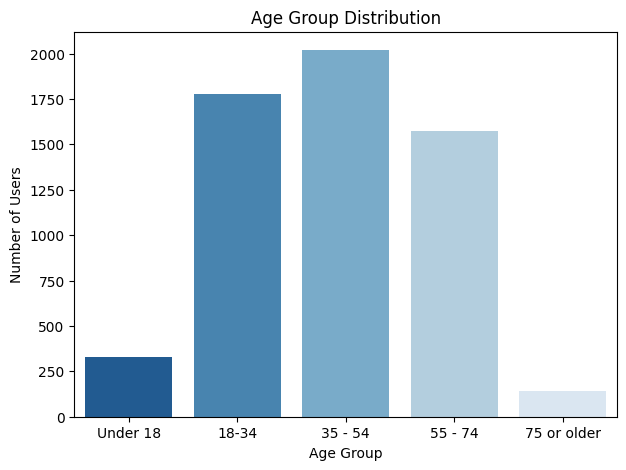

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
age_order = ['Under 18', '18-34', '35 - 54', '55 - 74', '75 or older']

plt.figure(figsize=(7,5))
sns.countplot(
    data=survey_data,
    x='age',   # age is already binned
    order=age_order,
    palette="Blues_r"
)
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Number of Users")
plt.show()

### Country Distribution

/tmp/ipython-input-2343850261.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


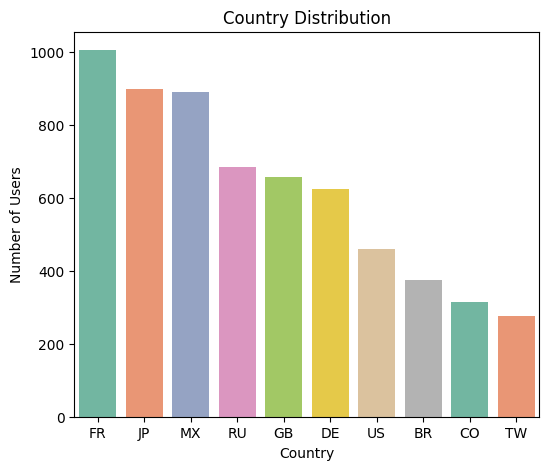

In [153]:
plt.figure(figsize=(6,5))
sns.countplot(
    data=survey_data,
    x='country',
    order=survey_data['country'].value_counts().index,  # sort by frequency
    palette="Set2"
)
plt.title("Country Distribution")
plt.xlabel("Country")
plt.ylabel("Number of Users")
plt.show()

### Income distribution

/tmp/ipython-input-1320498234.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=survey_data, x='annual_income', order=order, palette="Blues_r")


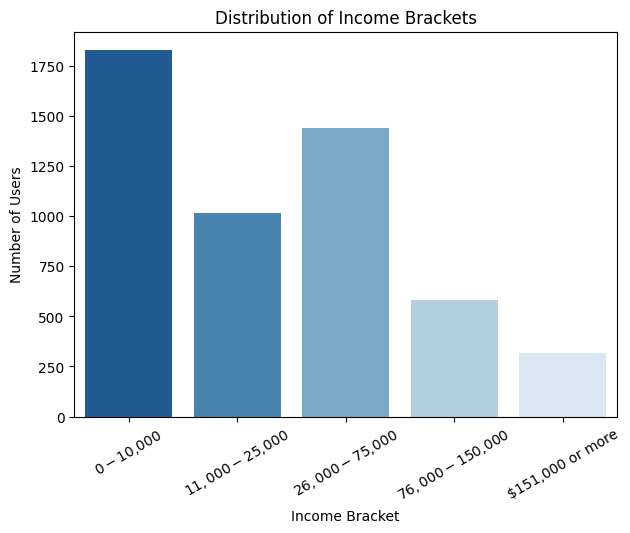

In [154]:
plt.figure(figsize=(7,5))
order = ["$0 - $10,000", "$11,000 - $25,000", "$26,000 - $75,000", "$76,000 - $150,000", "$151,000 or more"]
sns.countplot(data=survey_data, x='annual_income', order=order, palette="Blues_r")

plt.title("Distribution of Income Brackets")
plt.xlabel("Income Bracket")
plt.ylabel("Number of Users")
plt.xticks(rotation=30)
plt.show()

### Platforms

/tmp/ipython-input-2925090863.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=survey_data, x='duolingo_platform', palette="pastel")


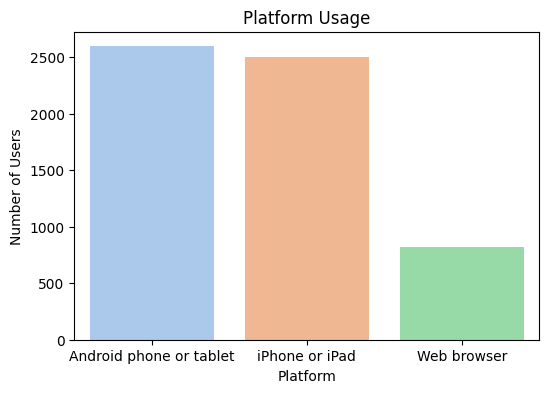

In [155]:
plt.figure(figsize=(6,4))
sns.countplot(data=survey_data, x='duolingo_platform', palette="pastel")
plt.title("Platform Usage")
plt.xlabel("Platform")
plt.ylabel("Number of Users")
plt.show()

### Commitment

/tmp/ipython-input-274295639.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


<Figure size 700x500 with 0 Axes>

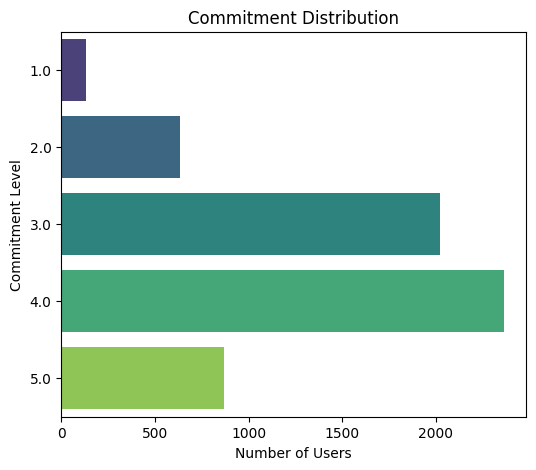

In [156]:
plt.figure(figsize=(7,5))

# Explicit order from 1 → 5
order = [1.0, 2.0, 3.0, 4.0, 5.0]

plt.figure(figsize=(6,5))
sns.countplot(
    data=survey_data,
    y='commitment_score',  # horizontal
    order=order,
    palette="viridis"
)

plt.title("Commitment Distribution")
plt.xlabel("Number of Users")
plt.ylabel("Commitment Level")
plt.show()

### Primary Language Review

/tmp/ipython-input-2603603669.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


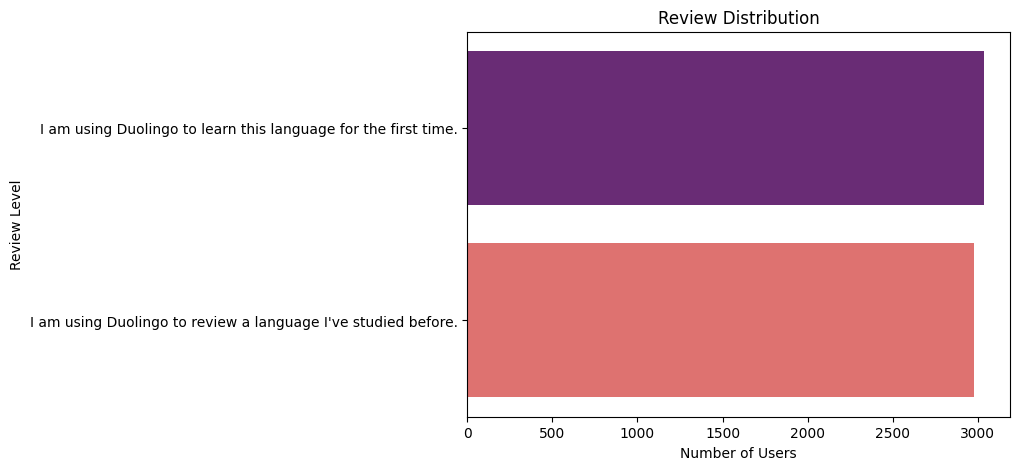

In [157]:
plt.figure(figsize=(7,5))
order = survey_data['primary_language_review'].value_counts().index
sns.countplot(
    data=survey_data,
    y='primary_language_review',
    order=order,
    palette="magma"
)
plt.title("Review Distribution")
plt.xlabel("Number of Users")
plt.ylabel("Review Level")
plt.show()

### Motivation

/tmp/ipython-input-2779401103.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


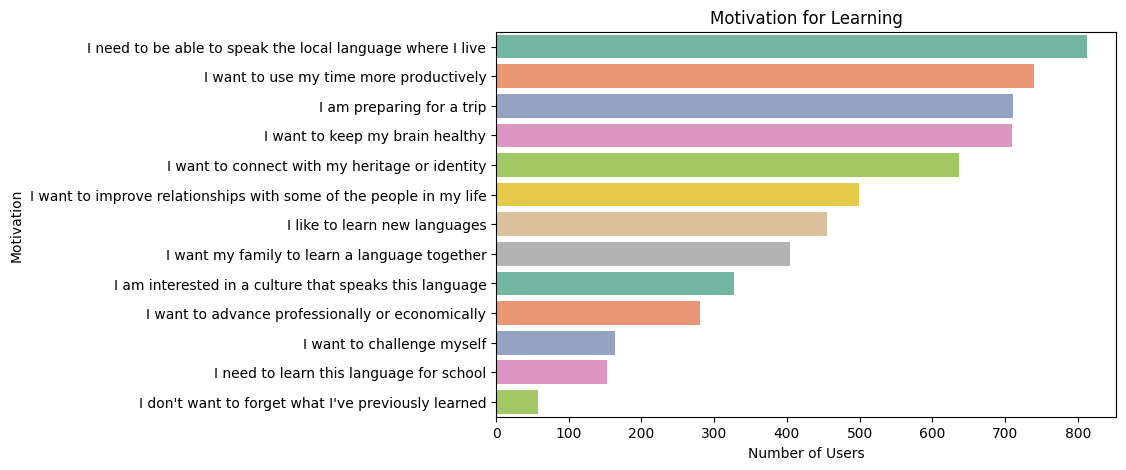

In [158]:
plt.figure(figsize=(8,5))
order = survey_data['primary_language_motivation'].value_counts().index
sns.countplot(
    data=survey_data,
    y='primary_language_motivation',
    order=order,
    palette="Set2"
)
plt.title("Motivation for Learning")
plt.xlabel("Number of Users")
plt.ylabel("Motivation")
plt.show()

/tmp/ipython-input-2435005526.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


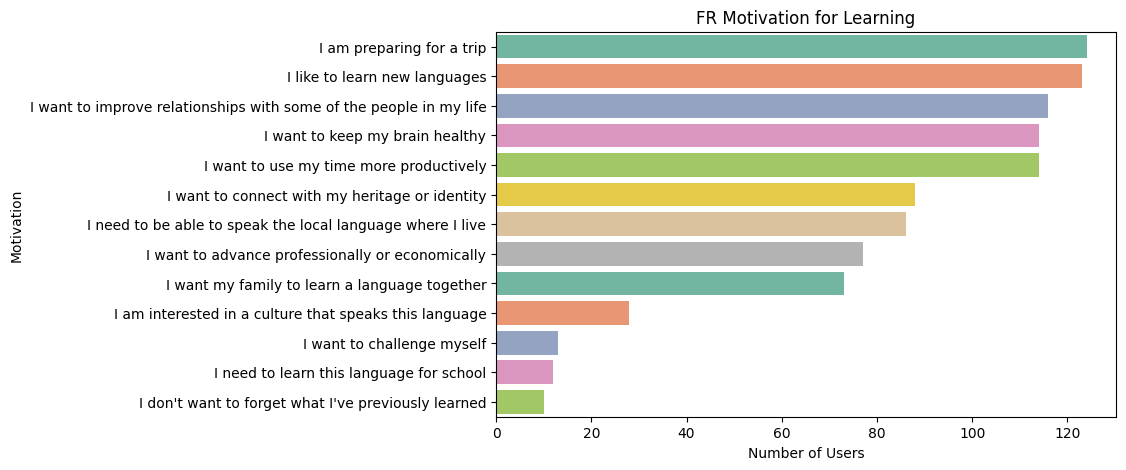

/tmp/ipython-input-2435005526.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


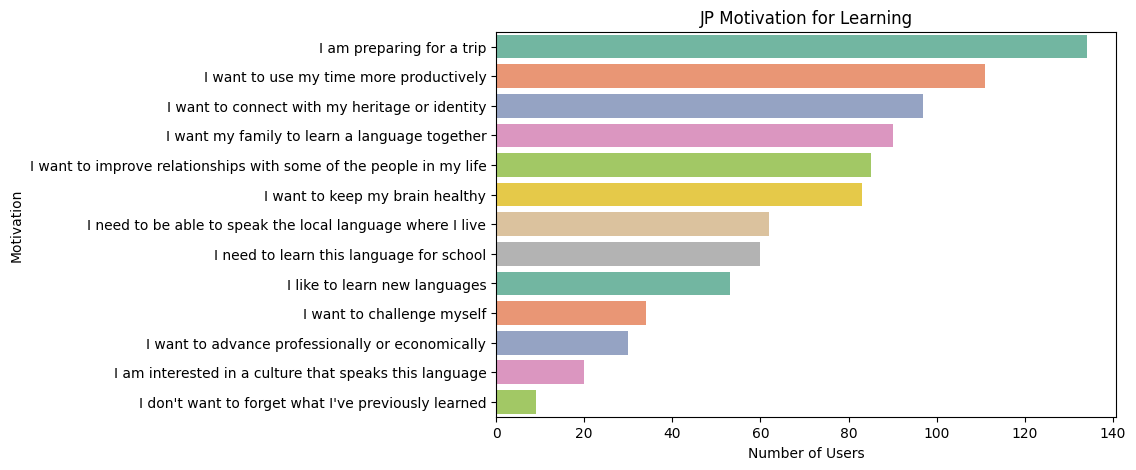

/tmp/ipython-input-2435005526.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


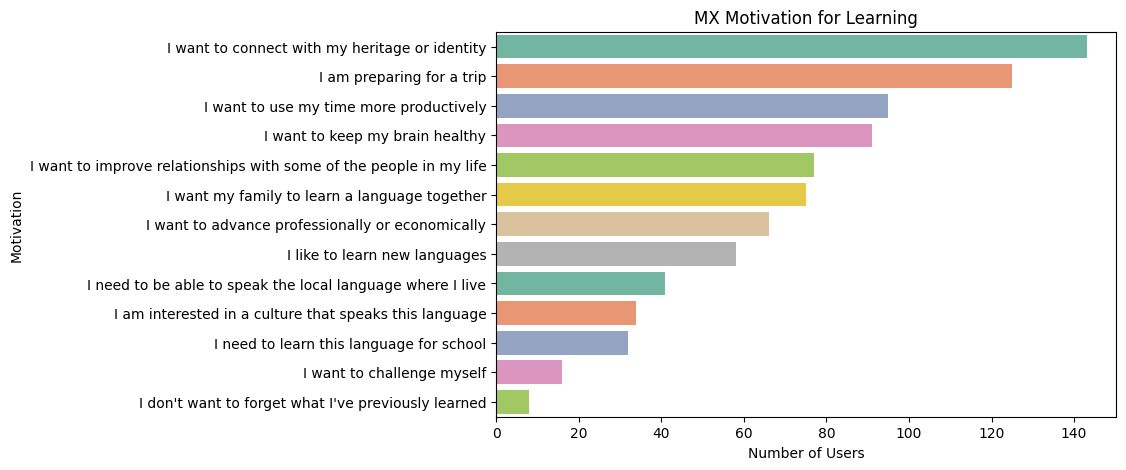

/tmp/ipython-input-2435005526.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


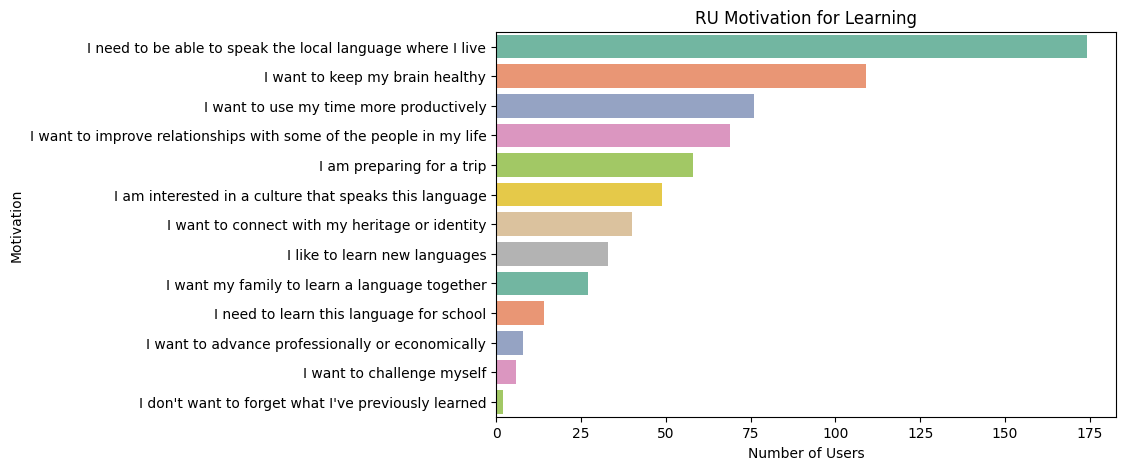

In [159]:
motivation_fr=survey_data[survey_data["country"]=="FR"]
motivation_jp=survey_data[survey_data["country"]=="JP"]
motivation_mx=survey_data[survey_data["country"]=="MX"]
motivation_ru=survey_data[survey_data["country"]=="RU"]

plt.figure(figsize=(8,5))
order = motivation_fr['primary_language_motivation'].value_counts().index
sns.countplot(
    data=motivation_fr,
    y='primary_language_motivation',
    order=order,
    palette="Set2"
)
plt.title("FR Motivation for Learning")
plt.xlabel("Number of Users")
plt.ylabel("Motivation")
plt.show()

plt.figure(figsize=(8,5))
order = motivation_jp['primary_language_motivation'].value_counts().index
sns.countplot(
    data=motivation_jp,
    y='primary_language_motivation',
    order=order,
    palette="Set2"
)
plt.title("JP Motivation for Learning")
plt.xlabel("Number of Users")
plt.ylabel("Motivation")
plt.show()

plt.figure(figsize=(8,5))
order = motivation_mx['primary_language_motivation'].value_counts().index
sns.countplot(
    data=motivation_mx,
    y='primary_language_motivation',
    order=order,
    palette="Set2"
)
plt.title("MX Motivation for Learning")
plt.xlabel("Number of Users")
plt.ylabel("Motivation")
plt.show()

plt.figure(figsize=(8,5))
order = motivation_ru['primary_language_motivation'].value_counts().index
sns.countplot(
    data=motivation_ru,
    y='primary_language_motivation',
    order=order,
    palette="Set2"
)
plt.title("RU Motivation for Learning")
plt.xlabel("Number of Users")
plt.ylabel("Motivation")
plt.show()

### Proficiency

/tmp/ipython-input-137476793.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


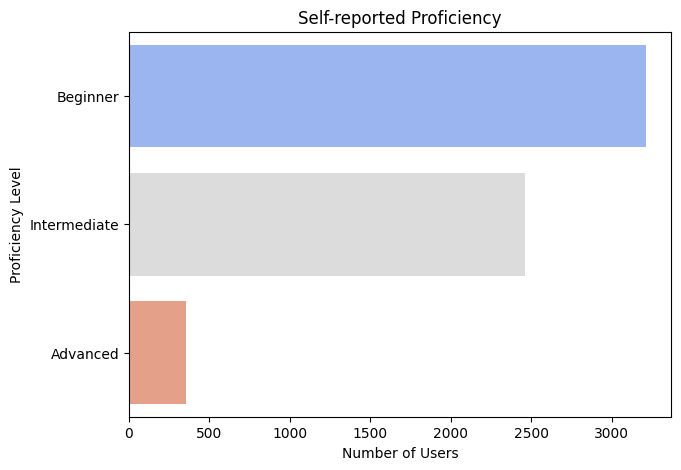

In [160]:
plt.figure(figsize=(7,5))
order = survey_data['primary_language_proficiency'].value_counts().index
sns.countplot(
    data=survey_data,
    y='primary_language_proficiency',
    order=order,
    palette="coolwarm"
)
plt.title("Self-reported Proficiency")
plt.xlabel("Number of Users")
plt.ylabel("Proficiency Level")
plt.show()

### Student or not

/tmp/ipython-input-2244521712.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=survey_data, x='student', palette="Accent")


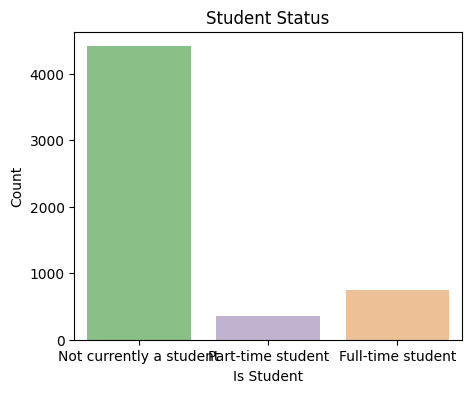

In [161]:
plt.figure(figsize=(5,4))
sns.countplot(data=survey_data, x='student', palette="Accent")
plt.title("Student Status")
plt.xlabel("Is Student")
plt.ylabel("Count")
plt.show()

## **survey_users_app_usage**

### Highest Course Progress

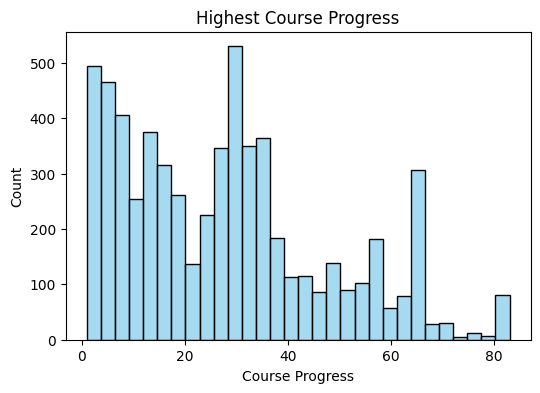

In [162]:
plt.figure(figsize=(6,4))
sns.histplot(survey_app_usage["highest_course_progress"].dropna(), bins=30, color="skyblue")
plt.title("Highest Course Progress")
plt.xlabel("Course Progress")
plt.ylabel("Count")
plt.show()

###Highest Crown Count

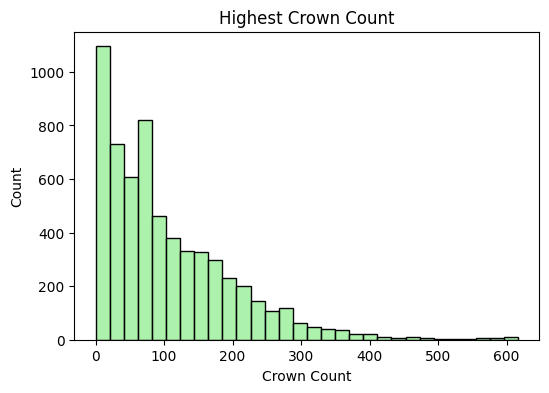

In [163]:
plt.figure(figsize=(6,4))
sns.histplot(survey_app_usage["highest_crown_count"].dropna(), bins=30, color="lightgreen")
plt.title("Highest Crown Count")
plt.xlabel("Crown Count")
plt.ylabel("Count")
plt.show()

###Active Days

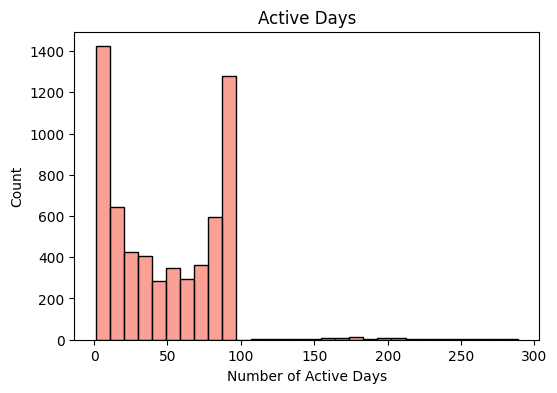

In [164]:
plt.figure(figsize=(6,4))
sns.histplot(survey_app_usage["n_active_days"].dropna(), bins=30, color="salmon")
plt.title("Active Days")
plt.xlabel("Number of Active Days")
plt.ylabel("Count")
plt.show()

### Lesson Started

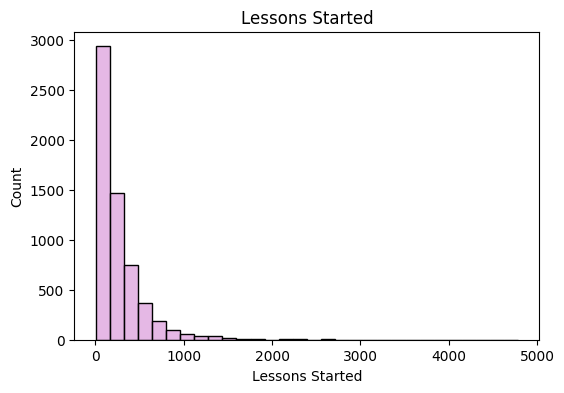

In [165]:
plt.figure(figsize=(6,4))
sns.histplot(survey_app_usage["n_lessons_started"].dropna(), bins=30, color="plum")
plt.title("Lessons Started")
plt.xlabel("Lessons Started")
plt.ylabel("Count")
plt.show()

### Lesson Completed

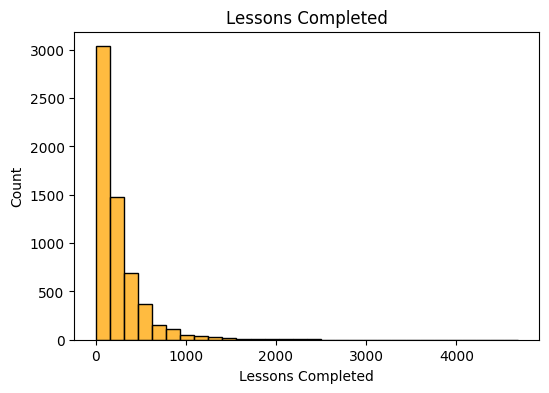

In [166]:
plt.figure(figsize=(6,4))
sns.histplot(survey_app_usage["n_lessons_completed"].dropna(), bins=30, color="orange")
plt.title("Lessons Completed")
plt.xlabel("Lessons Completed")
plt.ylabel("Count")
plt.show()

### Longest Streak

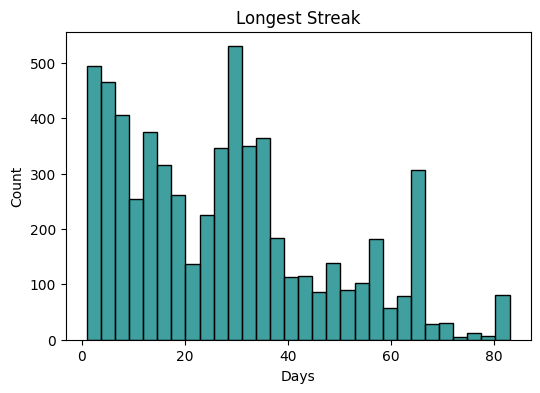

In [167]:
plt.figure(figsize=(6,4))
sns.histplot(survey_app_usage["longest_streak"].dropna(), bins=30, color="teal")
plt.title("Longest Streak")
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()

### Days on Platform

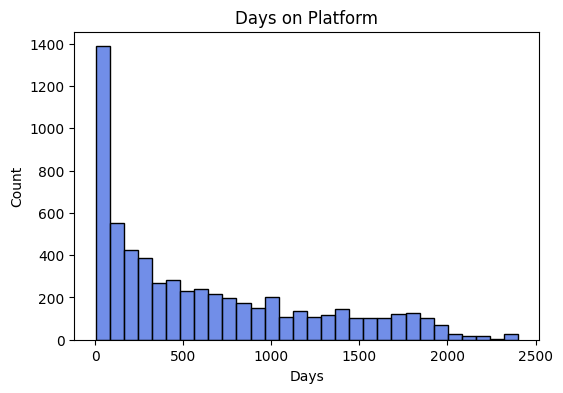

In [168]:
plt.figure(figsize=(6,4))
sns.histplot(survey_app_usage["n_days_on_platform"].dropna(), bins=30, color="royalblue")
plt.title("Days on Platform")
plt.xlabel("Days")
plt.ylabel("Count")
plt.show()

### Correlation (Longest Streak & Highest Crown)

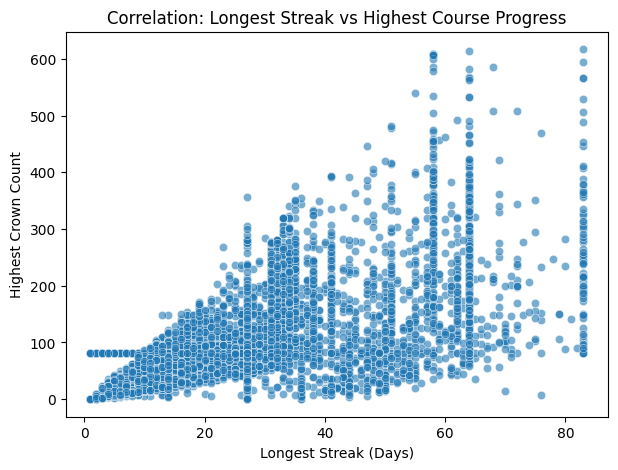

In [195]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=merged,
    x='longest_streak',
    y='highest_crown_count',
    alpha=0.6  # slightly transparent to see overlapping points
)

plt.title("Correlation: Longest Streak vs Highest Course Progress")
plt.xlabel("Longest Streak (Days)")
plt.ylabel("Highest Crown Count")
plt.show()

## **Combined**

### Does Setting Goal Effective?

**Highest Course Progress**

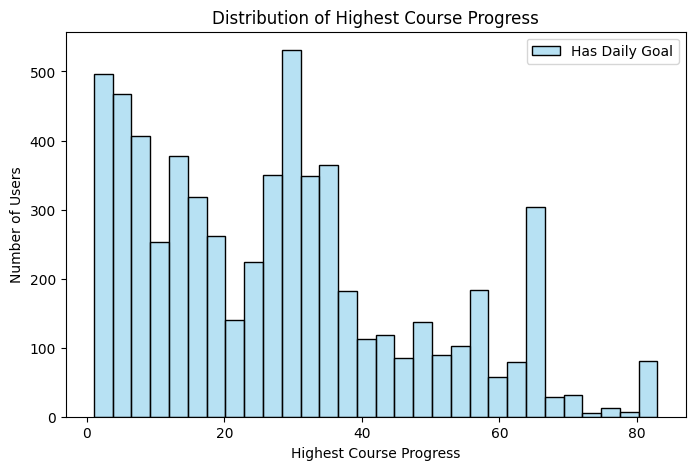

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data
with_goal = merged[merged['daily_goal'].notna()]['highest_course_progress']
without_goal = merged[merged['daily_goal'].isna()]['highest_course_progress']

# Plot
plt.figure(figsize=(8,5))
sns.histplot(with_goal, bins=30, color="skyblue", label="Has Daily Goal", kde=False, alpha=0.6)
sns.histplot(without_goal, bins=30, color="salmon", label="No Daily Goal", kde=False, alpha=0.6)

plt.title("Distribution of Highest Course Progress")
plt.xlabel("Highest Course Progress")
plt.ylabel("Number of Users")
plt.legend()
plt.show()

**Highest Crown Count**

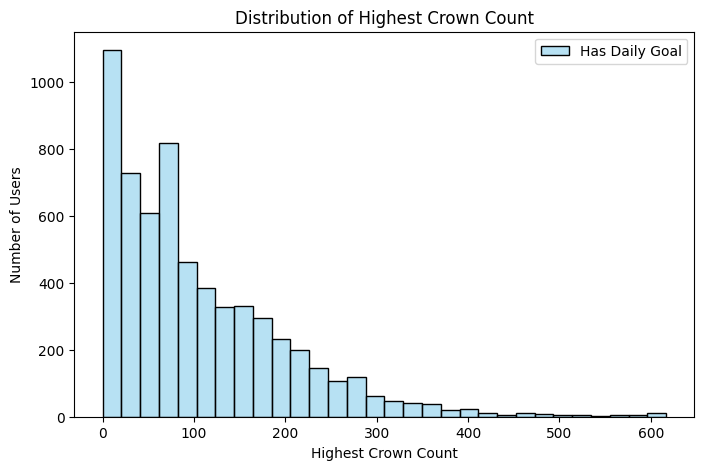

In [172]:
# Split the data
with_goal = merged[merged['daily_goal'].notna()]['highest_crown_count']
without_goal = merged[merged['daily_goal'].isna()]['highest_crown_count']

# Plot
plt.figure(figsize=(8,5))
sns.histplot(with_goal, bins=30, color="skyblue", label="Has Daily Goal", kde=False, alpha=0.6)
sns.histplot(without_goal, bins=30, color="salmon", label="No Daily Goal", kde=False, alpha=0.6)

plt.title("Distribution of Highest Crown Count")
plt.xlabel("Highest Crown Count")
plt.ylabel("Number of Users")
plt.legend()
plt.show()

**Longest Streak**

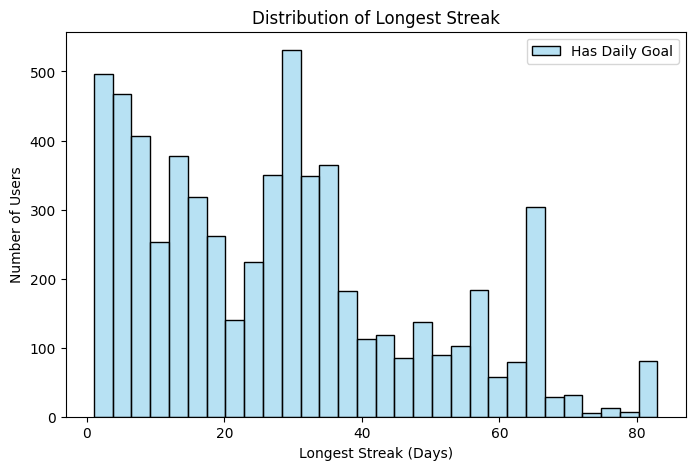

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data
with_goal = merged[merged['daily_goal'].notna()]['longest_streak']
without_goal = merged[merged['daily_goal'].isna()]['longest_streak']

# Plot
plt.figure(figsize=(8,5))
sns.histplot(with_goal, bins=30, color="skyblue", label="Has Daily Goal", kde=False, alpha=0.6)
sns.histplot(without_goal, bins=30, color="salmon", label="No Daily Goal", kde=False, alpha=0.6)

plt.title("Distribution of Longest Streak")
plt.xlabel("Longest Streak (Days)")
plt.ylabel("Number of Users")
plt.legend()
plt.show()

##Is Taking Placement Test Help Found?

**Highest Course Progress**

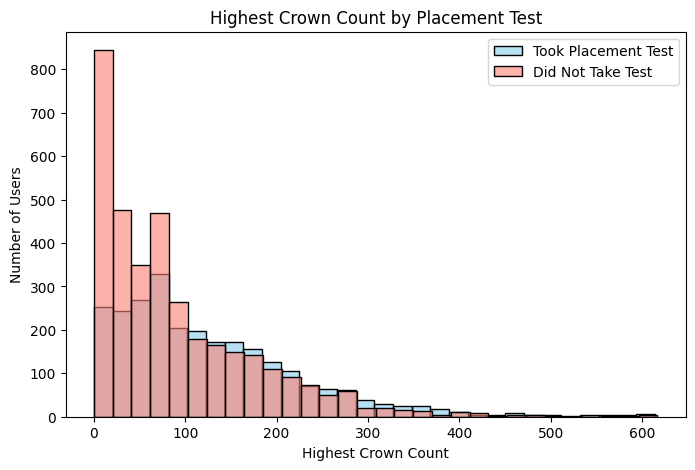

In [186]:
plt.figure(figsize=(8,5))

# Split the data
yes_test = merged[merged['took_placement_test'] == True]['highest_crown_count']
no_test = merged[merged['took_placement_test'] == False]['highest_crown_count']

# Plot
sns.histplot(yes_test, bins=30, color="skyblue", label="Took Placement Test", kde=False, alpha=0.6)
sns.histplot(no_test, bins=30, color="salmon", label="Did Not Take Test", kde=False, alpha=0.6)

plt.title("Highest Crown Count by Placement Test")
plt.xlabel("Highest Crown Count")
plt.ylabel("Number of Users")
plt.legend()
plt.show()

**Highest Course Complete**

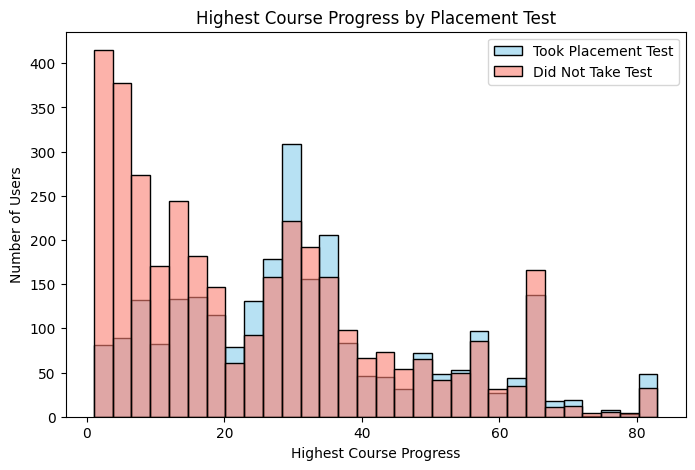

In [187]:
plt.figure(figsize=(8,5))

yes_test = merged[merged['took_placement_test'] == True]['highest_course_progress']
no_test = merged[merged['took_placement_test'] == False]['highest_course_progress']

sns.histplot(yes_test, bins=30, color="skyblue", label="Took Placement Test", kde=False, alpha=0.6)
sns.histplot(no_test, bins=30, color="salmon", label="Did Not Take Test", kde=False, alpha=0.6)

plt.title("Highest Course Progress by Placement Test")
plt.xlabel("Highest Course Progress")
plt.ylabel("Number of Users")
plt.legend()
plt.show()

**Longest Streak**

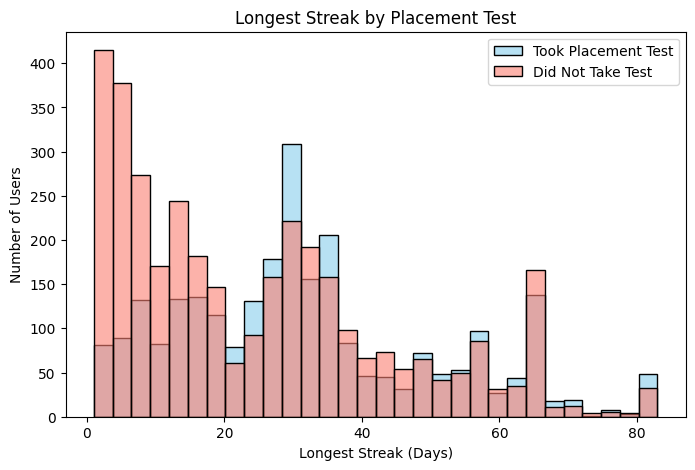

In [188]:
plt.figure(figsize=(8,5))

yes_test = merged[merged['took_placement_test'] == True]['longest_streak']
no_test = merged[merged['took_placement_test'] == False]['longest_streak']

sns.histplot(yes_test, bins=30, color="skyblue", label="Took Placement Test", kde=False, alpha=0.6)
sns.histplot(no_test, bins=30, color="salmon", label="Did Not Take Test", kde=False, alpha=0.6)

plt.title("Longest Streak by Placement Test")
plt.xlabel("Longest Streak (Days)")
plt.ylabel("Number of Users")
plt.legend()
plt.show()

**primary_language_review**

/tmp/ipython-input-1742592390.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


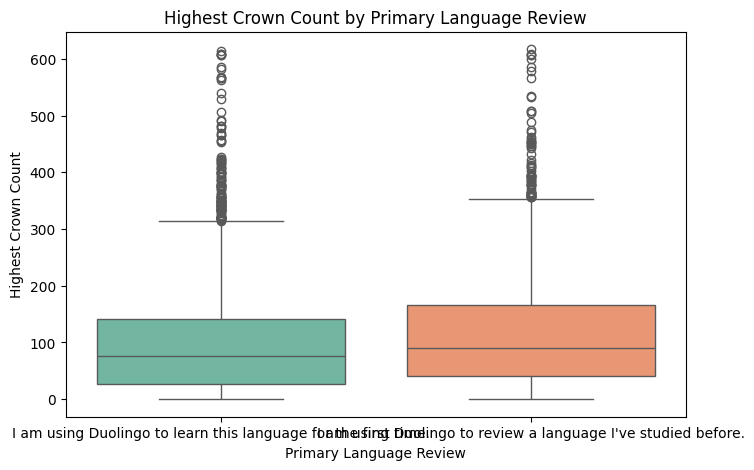

In [189]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=merged,
    x='primary_language_review',
    y='highest_crown_count',
    palette="Set2"
)
plt.title("Highest Crown Count by Primary Language Review")
plt.xlabel("Primary Language Review")
plt.ylabel("Highest Crown Count")
plt.show()

/tmp/ipython-input-220116682.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


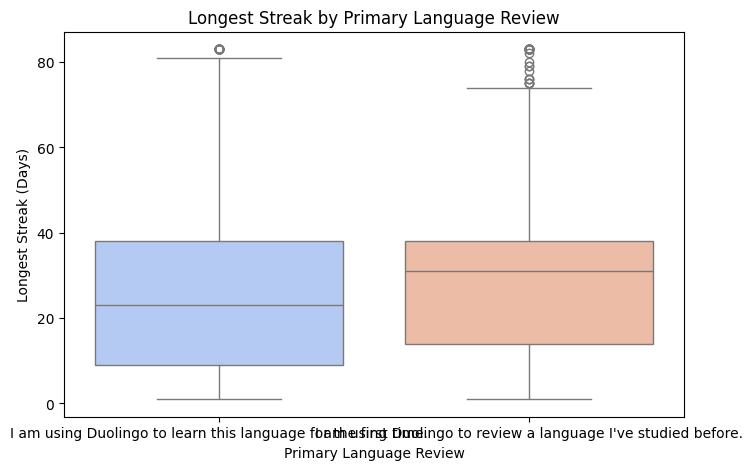

In [190]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=merged,
    x='primary_language_review',
    y='longest_streak',
    palette="coolwarm"
)
plt.title("Longest Streak by Primary Language Review")
plt.xlabel("Primary Language Review")
plt.ylabel("Longest Streak (Days)")
plt.show()

**primary_language_commitment**

/tmp/ipython-input-550250473.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


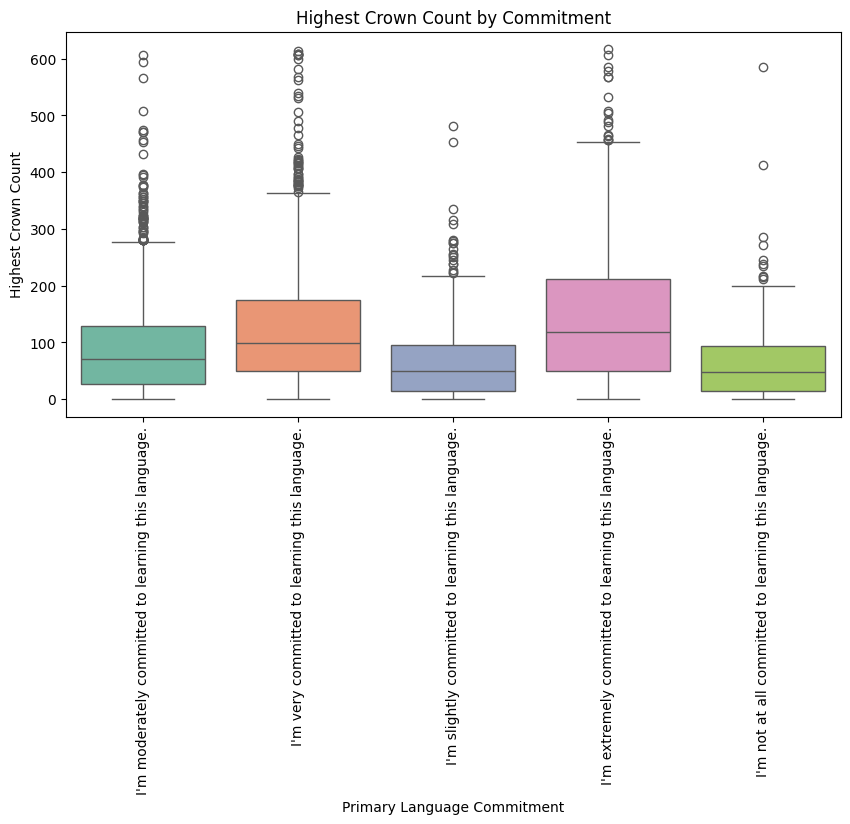

In [191]:
plt.figure(figsize=(10,5))
sns.boxplot(
    data=streak_valid,
    x='primary_language_commitment',
    y='highest_crown_count',
    palette="Set2"
)
plt.title("Highest Crown Count by Commitment")
plt.xlabel("Primary Language Commitment")
plt.ylabel("Highest Crown Count")
plt.xticks(rotation=90)  # Rotate labels vertically
plt.show()

/tmp/ipython-input-2282271891.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


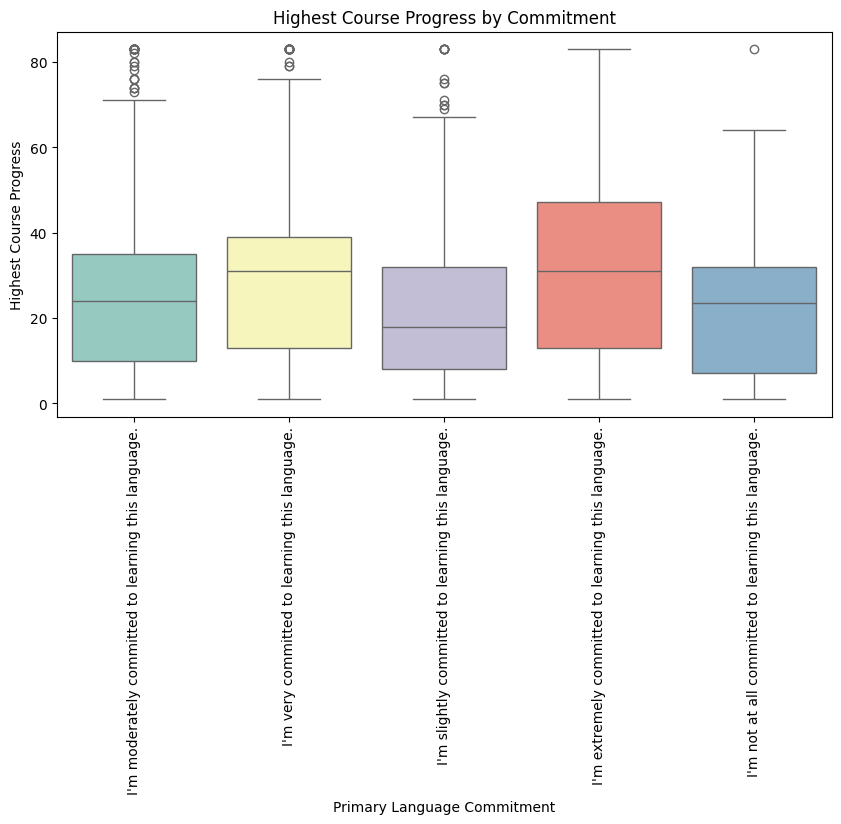

In [192]:
plt.figure(figsize=(10,5))
sns.boxplot(
    data=merged,
    x='primary_language_commitment',
    y='highest_course_progress',
    palette="Set3"
)
plt.title("Highest Course Progress by Commitment")
plt.xlabel("Primary Language Commitment")
plt.ylabel("Highest Course Progress")
plt.xticks(rotation=90)
plt.show()

/tmp/ipython-input-1742221610.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


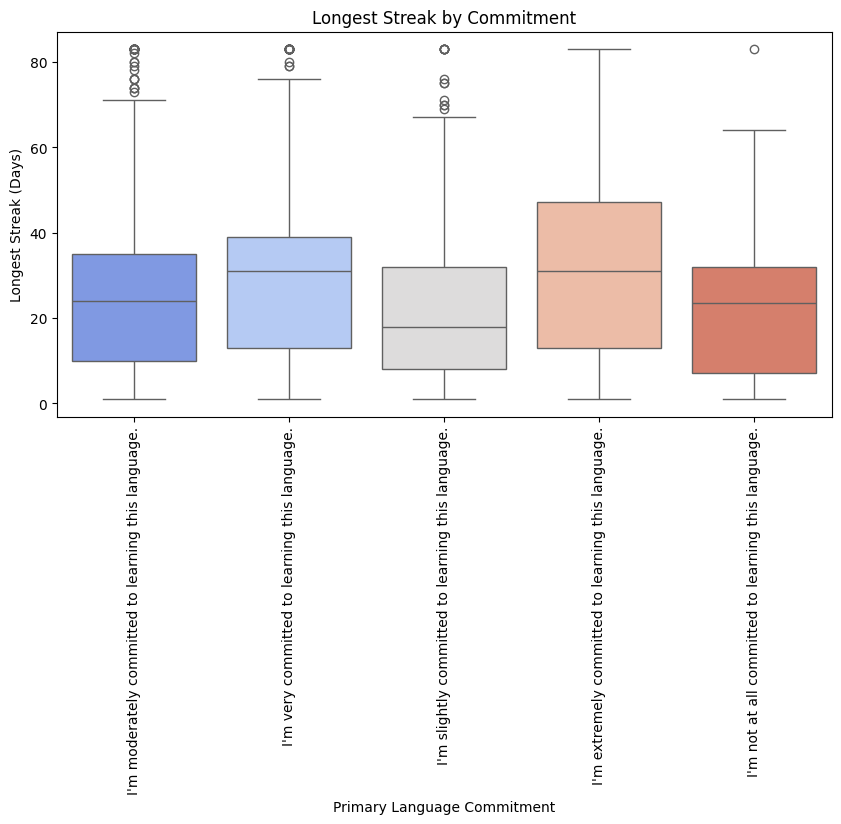

In [193]:
plt.figure(figsize=(10,5))
sns.boxplot(
    data=merged,
    x='primary_language_commitment',
    y='longest_streak',
    palette="coolwarm"
)
plt.title("Longest Streak by Commitment")
plt.xlabel("Primary Language Commitment")
plt.ylabel("Longest Streak (Days)")
plt.xticks(rotation=90)
plt.show()

# User Segmentation

In [205]:
# 1. Calculate the tertiles (T1 and T2) for equal population splits
T1 = merged['longest_streak'].quantile(0.333)
T2 = merged['longest_streak'].quantile(0.667)

# 2. Define the bins using the calculated tertiles
# The bins must cover the entire range, so we use min() and max()
bins = [merged['longest_streak'].min() - 1, T1, T2, merged['longest_streak'].max() + 1]
labels = ["Light User", "Medium User", "Heavy User"]

# 3. Create the categorical column using pd.cut
merged['user_category_streak'] = pd.cut(
    merged['longest_streak'],
    bins=bins,
    labels=labels,
    right=True,        # (A, B] interval format: greater than A, up to and including B
    include_lowest=True  # Ensure the minimum value is included
)

# 4. Get the count of users in each category
category_counts = merged['user_category_streak'].value_counts().sort_index()

# 5. Print the results
print(f"T1 (Light/Medium Cutoff) = {T1:.2f} days")
print(f"T2 (Medium/Heavy Cutoff) = {T2:.2f} days")
print("\nUser Counts by Longest Streak Category:")
print(category_counts)

T1 (Light/Medium Cutoff) = 15.00 days
T2 (Medium/Heavy Cutoff) = 33.00 days

User Counts by Longest Streak Category:
user_category_streak
Light User     2088
Medium User    2084
Heavy User     1979
Name: count, dtype: int64


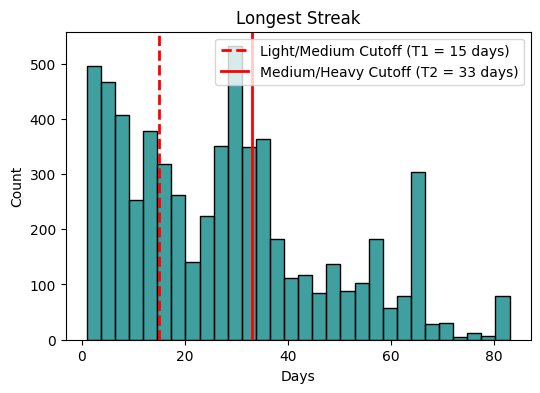

In [208]:

T1 = 15.0
T2 = 33.0

plt.figure(figsize=(6,4))

# Histogram
sns.histplot(merged["longest_streak"].dropna(), bins=30, color="teal")

# Overlay vertical lines
plt.axvline(
    x=T1,
    color='red',
    linestyle='--',
    linewidth=2,
    label=f'Light/Medium Cutoff (T1 = {T1:.0f} days)'
)

plt.axvline(
    x=T2,
    color='red',
    linestyle='-',
    linewidth=2,
    label=f'Medium/Heavy Cutoff (T2 = {T2:.0f} days)'
)

plt.title("Longest Streak")
plt.xlabel("Days")
plt.ylabel("Count")
plt.legend()
plt.show()


In [206]:
# 1. Calculate the tertiles (T1 and T2) for equal population splits
T1 = merged["highest_crown_count"].quantile(0.333)
T2 = merged["highest_crown_count"].quantile(0.667)

# 2. Define the bins using the calculated tertiles
# The bins must cover the entire range, so we use min() and max()
bins = [merged["highest_crown_count"].min() - 1, T1, T2, merged["highest_crown_count"].max() + 1]
labels = ["Light User", "Medium User", "Heavy User"]

# 3. Create the categorical column using pd.cut
merged['user_category_streak'] = pd.cut(
    merged["highest_crown_count"],
    bins=bins,
    labels=labels,
    right=True,        # (A, B] interval format: greater than A, up to and including B
    include_lowest=True  # Ensure the minimum value is included
)

# 4. Get the count of users in each category
category_counts = merged['user_category_streak'].value_counts().sort_index()

# 5. Print the results
print(f"T1 (Light/Medium Cutoff) = {T1:.2f}")
print(f"T2 (Medium/Heavy Cutoff) = {T2:.2f}")
print("\nUser Counts by Highest Crown Count Category:")
print(category_counts)

T1 (Light/Medium Cutoff) = 48.00
T2 (Medium/Heavy Cutoff) = 124.00

User Counts by Highest Crown Count Category:
user_category_streak
Light User     2056
Medium User    2054
Heavy User     2041
Name: count, dtype: int64


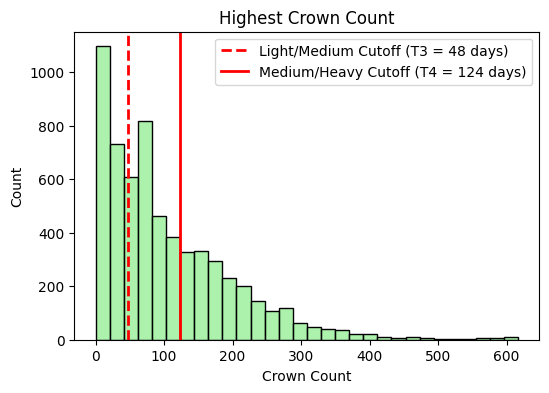

In [211]:
T3 = 48.0
T4 = 124.0

plt.figure(figsize=(6,4))

# Histogram
sns.histplot(merged["highest_crown_count"].dropna(), bins=30, color="lightgreen")

# Overlay vertical lines
plt.axvline(
    x=T3,
    color='red',
    linestyle='--',
    linewidth=2,
    label=f'Light/Medium Cutoff (T3 = {T3:.0f} days)'
)

plt.axvline(
    x=T4,
    color='red',
    linestyle='-',
    linewidth=2,
    label=f'Medium/Heavy Cutoff (T4 = {T4:.0f} days)'
)

plt.title("Highest Crown Count")
plt.xlabel("Crown Count")
plt.ylabel("Count")
plt.legend()
plt.show()

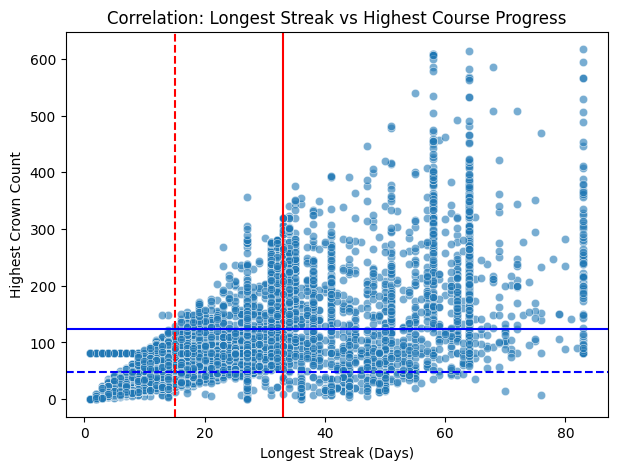

In [215]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=merged,
    x='longest_streak',
    y='highest_crown_count',
    alpha=0.6  # slightly transparent to see overlapping points
)
# Vertical lines for Longest Streak (X-axis)
# Light/Medium Boundary (Longest Streak = 15)
plt.axvline(x=15, color='red', linestyle='--', linewidth=1.5, label='X-Boundary: Light/Medium (20)')
# Medium/Heavy Boundary (Longest Streak = 33)
plt.axvline(x=33, color='red', linestyle='-', linewidth=1.5, label='X-Boundary: Medium/Heavy (60)')

# Horizontal lines for Highest Crown Count (Y-axis)
# Light/Medium Boundary (Highest Crown Count = 48)
plt.axhline(y=48, color='blue', linestyle='--', linewidth=1.5, label='Y-Boundary: Light/Medium (100)')
# Medium/Heavy Boundary (Highest Crown Count = 124)
plt.axhline(y=124, color='blue', linestyle='-', linewidth=1.5, label='Y-Boundary: Medium/Heavy (300)')

plt.title("Correlation: Longest Streak vs Highest Course Progress")
plt.xlabel("Longest Streak (Days)")
plt.ylabel("Highest Crown Count")
plt.show()

In [222]:
def user_category(row):
    streak = row['longest_streak']
    crown = row['highest_crown_count']

    if streak <= 15 and crown <= 48:
        return "Light User"
    elif streak <= 33 and crown <= 124:
        return "Medium User"
    else:
        return "Heavy User"

merged['user_category'] = merged.apply(user_category, axis=1)
merged

,user_id,duolingo_start_date,daily_goal,highest_course_progress,took_placement_test,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,...,primary_language_commitment,primary_language_review,primary_language_motivation,primary_language_motivation_followup,primary_language_proficiency,student,survey_complete,time_spent_seconds,commitment_score,user_category
0,35cb7e8f72c911e9888edca9049399ef,1/10/22 21:14,0.0,46.0,True,False,277.0,88,741.0,668.0,...,I'm moderately committed to learning this lang...,I am using Duolingo to learn this language for...,I want to use my time more productively,I want to spend less time watching or reading ...,Beginner,Not currently a student,1,411,3.0,Heavy User
1,35ca34fd72c911e99ed6dca9049399ef,2/28/21 5:01,0.0,50.0,True,False,62.0,16,57.0,57.0,...,I'm moderately committed to learning this lang...,I am using Duolingo to learn this language for...,I need to learn this language for school,Other (please specify),Intermediate,Not currently a student,1,175,3.0,Heavy User
2,35d1a54a72c911e98e25dca9049399ef,5/7/18 17:55,1.0,71.0,False,False,202.0,29,315.0,295.0,...,I'm very committed to learning this language.,I am using Duolingo to review a language I've ...,I need to be able to speak the local language ...,"I am an expat,I am studying abroad",Intermediate,Part-time student,1,300,4.0,Heavy User
3,35d4beb072c911e9aa92dca9049399ef,4/27/22 9:28,0.0,2.0,False,False,2.0,3,6.0,5.0,...,I'm slightly committed to learning this language.,I am using Duolingo to learn this language for...,I want to use my time more productively,I want to spend less time on social media,Beginner,Not currently a student,1,603,2.0,Light User
4,35ccf4bd72c911e9be2edca9049399ef,4/9/19 3:16,0.0,34.0,False,False,216.0,57,338.0,297.0,...,I'm moderately committed to learning this lang...,I am using Duolingo to review a language I've ...,I need to be able to speak the local language ...,I am studying abroad,Intermediate,Full-time student,1,539,3.0,Heavy User
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6146,35cc559972c911e9a65ddca9049399ef,10/31/19 14:15,20.0,27.0,False,False,17.0,9,74.0,73.0,...,I'm very committed to learning this language.,I am using Duolingo to learn this language for...,I need to learn this language for school,"Duolingo is an optional supplement to a class,...",Beginner,Full-time student,1,218,4.0,Medium User
6147,35d0323a72c911e9bc0ddca9049399ef,9/19/17 4:20,0.0,27.0,False,False,35.0,23,70.0,68.0,...,I'm moderately committed to learning this lang...,I am using Duolingo to review a language I've ...,I want to improve relationships with some of t...,I want to better communicate with people in my...,Intermediate,Not currently a student,1,503,3.0,Medium User
6148,35cbcbb572c911e9807ddca9049399ef,4/16/19 1:15,0.0,27.0,False,False,81.0,27,29.0,58.0,...,I'm slightly committed to learning this language.,I am using Duolingo to review a language I've ...,I want to use my time more productively,I want to spend less time on social media,Intermediate,Not currently a student,1,319,2.0,Medium User
6149,35cffde372c911e9b4afdca9049399ef,1/7/22 6:55,20.0,27.0,False,False,19.0,94,192.0,185.0,...,I'm very committed to learning this language.,I am using Duolingo to learn this language for...,I am preparing for a trip,I want to learn some basics in the local langu...,Beginner,Not currently a student,1,651,4.0,Medium User


In [223]:
heavy_df=merged[merged["user_category"]=="Heavy User"]
medium_df=merged[merged["user_category"]=="Medium User"]
light_df=merged[merged["user_category"]=="Light User"]

### Analysis on Heavy User

/tmp/ipython-input-4177679476.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


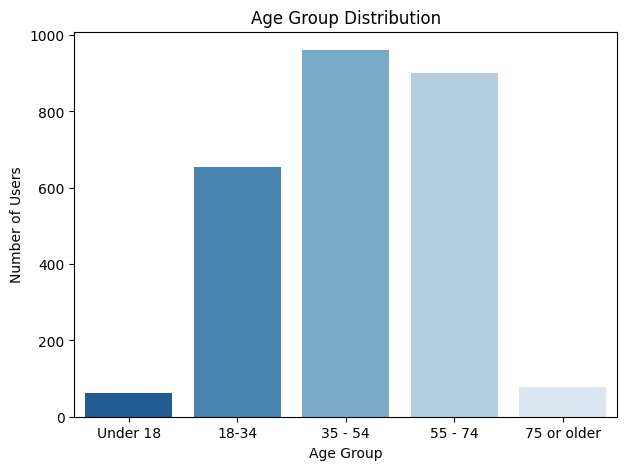

In [224]:
age_order = ['Under 18', '18-34', '35 - 54', '55 - 74', '75 or older']

plt.figure(figsize=(7,5))
sns.countplot(
    data=heavy_df,
    x='age',   # age is already binned
    order=age_order,
    palette="Blues_r"
)
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Number of Users")
plt.show()

/tmp/ipython-input-622581537.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=heavy_df, x='annual_income', order=order, palette="Blues_r")


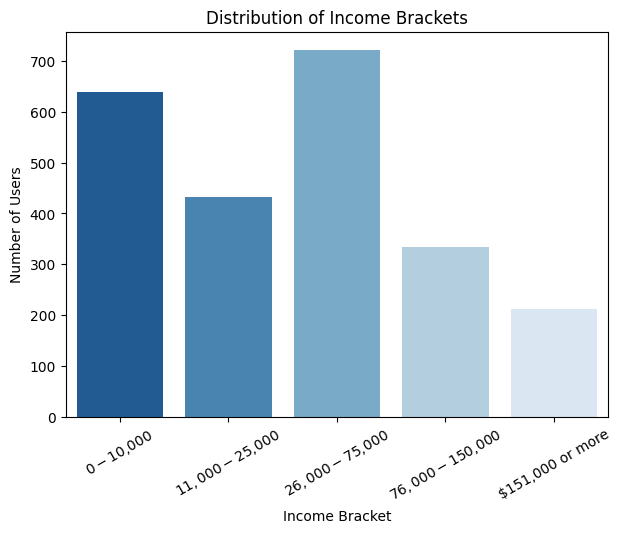

In [228]:
plt.figure(figsize=(7,5))
order = ["$0 - $10,000", "$11,000 - $25,000", "$26,000 - $75,000", "$76,000 - $150,000", "$151,000 or more"]
sns.countplot(data=heavy_df, x='annual_income', order=order, palette="Blues_r")

plt.title("Distribution of Income Brackets")
plt.xlabel("Income Bracket")
plt.ylabel("Number of Users")
plt.xticks(rotation=30)
plt.show()

/tmp/ipython-input-2108308523.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=heavy_df, x='student', palette="Accent")


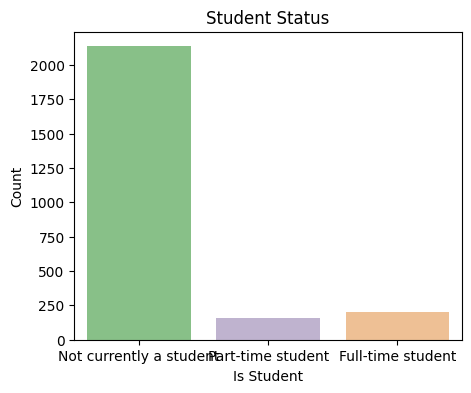

In [238]:
plt.figure(figsize=(5,4))
sns.countplot(data=heavy_df, x='student', palette="Accent")
plt.title("Student Status")
plt.xlabel("Is Student")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-1980153423.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


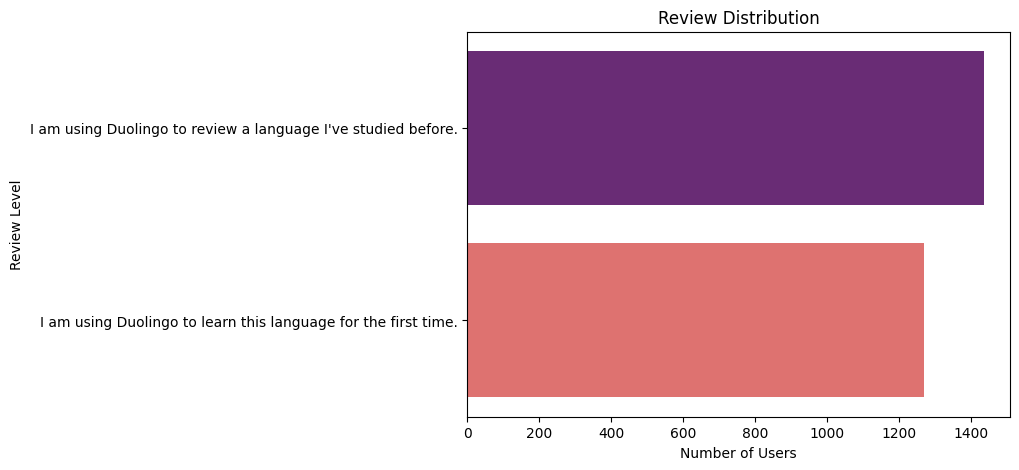

In [241]:
plt.figure(figsize=(7,5))
order = heavy_df['primary_language_review'].value_counts().index
sns.countplot(
    data=heavy_df,
    y='primary_language_review',
    order=order,
    palette="magma"
)
plt.title("Review Distribution")
plt.xlabel("Number of Users")
plt.ylabel("Review Level")
plt.show()

/tmp/ipython-input-2938017444.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


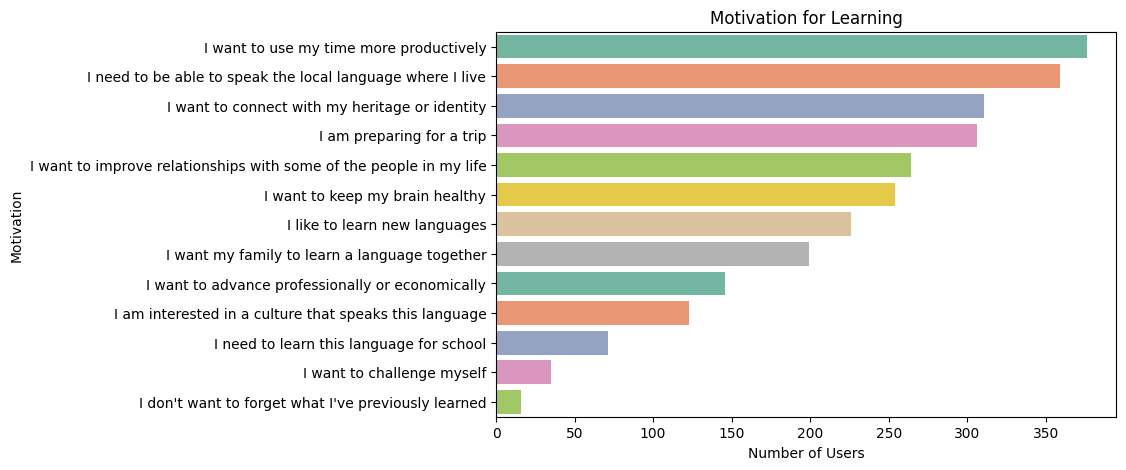

In [235]:
plt.figure(figsize=(8,5))
order = heavy_df['primary_language_motivation'].value_counts().index
sns.countplot(
    data=heavy_df,
    y='primary_language_motivation',
    order=order,
    palette="Set2"
)
plt.title("Motivation for Learning")
plt.xlabel("Number of Users")
plt.ylabel("Motivation")
plt.show()

## Analysis on Medium User

/tmp/ipython-input-1257582400.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


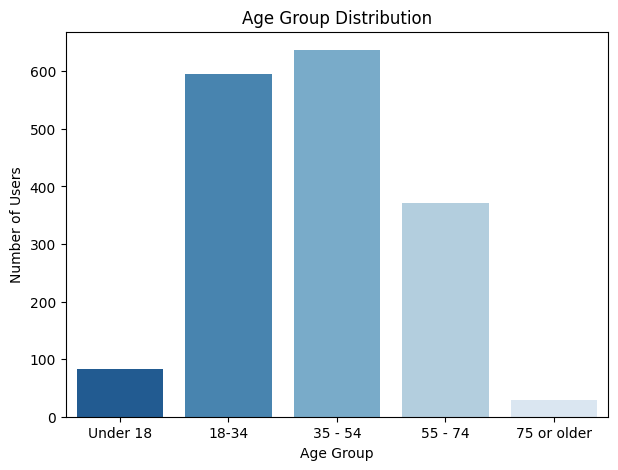

In [229]:
age_order = ['Under 18', '18-34', '35 - 54', '55 - 74', '75 or older']

plt.figure(figsize=(7,5))
sns.countplot(
    data=medium_df,
    x='age',   # age is already binned
    order=age_order,
    palette="Blues_r"
)
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Number of Users")
plt.show()

/tmp/ipython-input-997254100.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=medium_df, x='annual_income', order=order, palette="Blues_r")


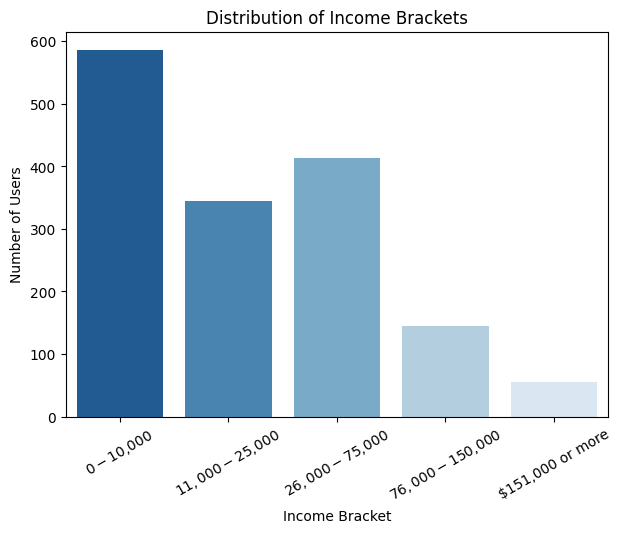

In [230]:
plt.figure(figsize=(7,5))
order = ["$0 - $10,000", "$11,000 - $25,000", "$26,000 - $75,000", "$76,000 - $150,000", "$151,000 or more"]
sns.countplot(data=medium_df, x='annual_income', order=order, palette="Blues_r")

plt.title("Distribution of Income Brackets")
plt.xlabel("Income Bracket")
plt.ylabel("Number of Users")
plt.xticks(rotation=30)
plt.show()

/tmp/ipython-input-471284841.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=medium_df, x='student', palette="Accent")


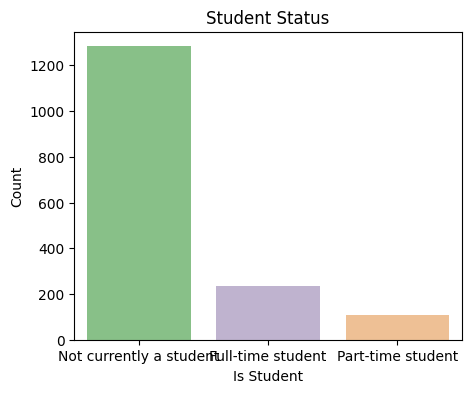

In [239]:
plt.figure(figsize=(5,4))
sns.countplot(data=medium_df, x='student', palette="Accent")
plt.title("Student Status")
plt.xlabel("Is Student")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-3348115949.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


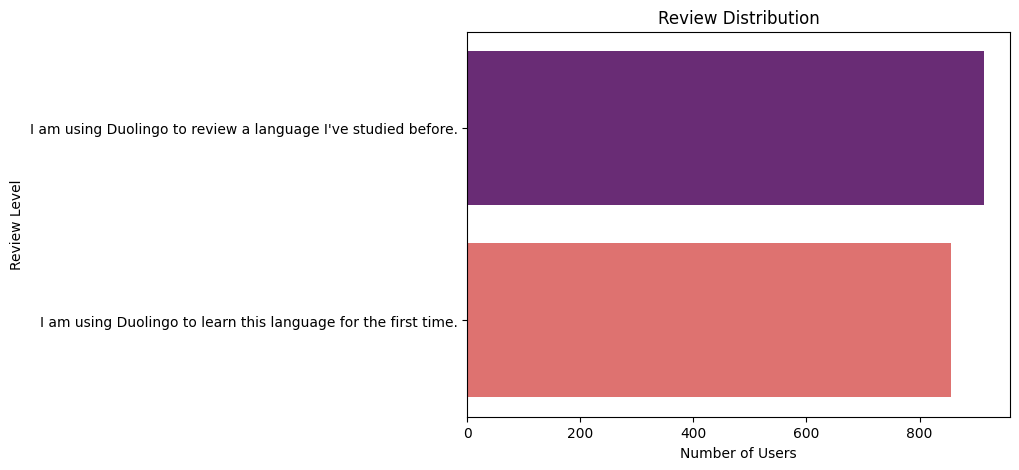

In [242]:
plt.figure(figsize=(7,5))
order = medium_df['primary_language_review'].value_counts().index
sns.countplot(
    data=medium_df,
    y='primary_language_review',
    order=order,
    palette="magma"
)
plt.title("Review Distribution")
plt.xlabel("Number of Users")
plt.ylabel("Review Level")
plt.show()

/tmp/ipython-input-3286076267.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


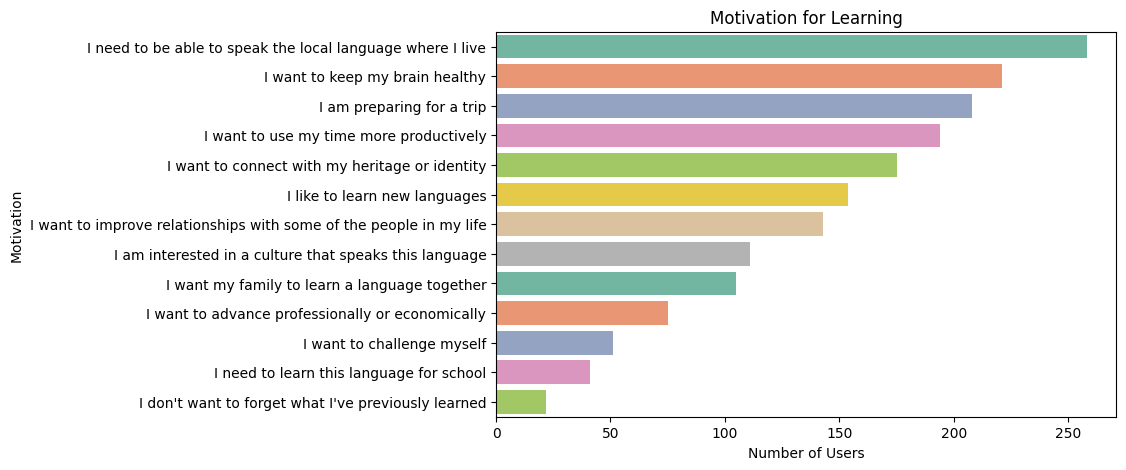

In [236]:
plt.figure(figsize=(8,5))
order = medium_df['primary_language_motivation'].value_counts().index
sns.countplot(
    data=medium_df,
    y='primary_language_motivation',
    order=order,
    palette="Set2"
)
plt.title("Motivation for Learning")
plt.xlabel("Number of Users")
plt.ylabel("Motivation")
plt.show()

### Analysis on Light User

/tmp/ipython-input-998279563.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


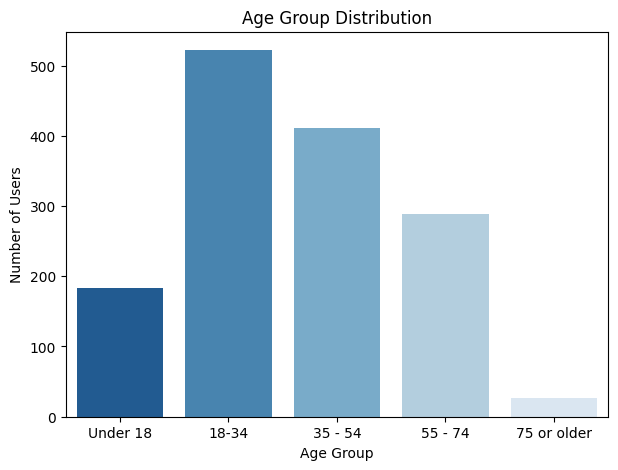

In [231]:
age_order = ['Under 18', '18-34', '35 - 54', '55 - 74', '75 or older']

plt.figure(figsize=(7,5))
sns.countplot(
    data=light_df,
    x='age',   # age is already binned
    order=age_order,
    palette="Blues_r"
)
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Number of Users")
plt.show()

/tmp/ipython-input-278048611.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=light_df, x='annual_income', order=order, palette="Blues_r")


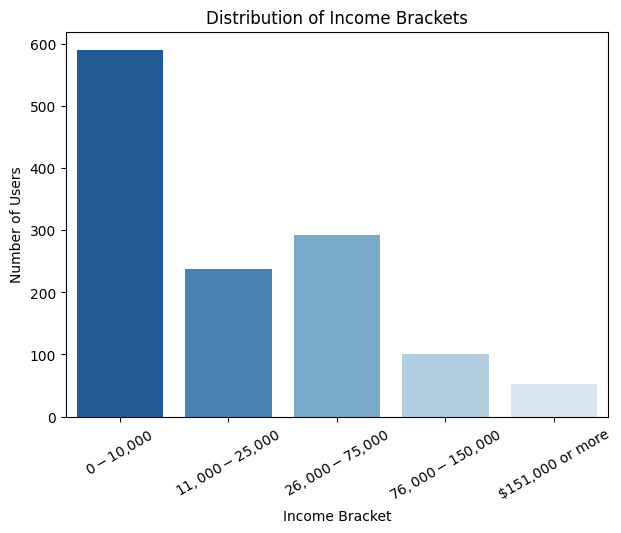

In [232]:
plt.figure(figsize=(7,5))
order = ["$0 - $10,000", "$11,000 - $25,000", "$26,000 - $75,000", "$76,000 - $150,000", "$151,000 or more"]
sns.countplot(data=light_df, x='annual_income', order=order, palette="Blues_r")

plt.title("Distribution of Income Brackets")
plt.xlabel("Income Bracket")
plt.ylabel("Number of Users")
plt.xticks(rotation=30)
plt.show()

/tmp/ipython-input-987126574.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=light_df, x='student', palette="Accent")


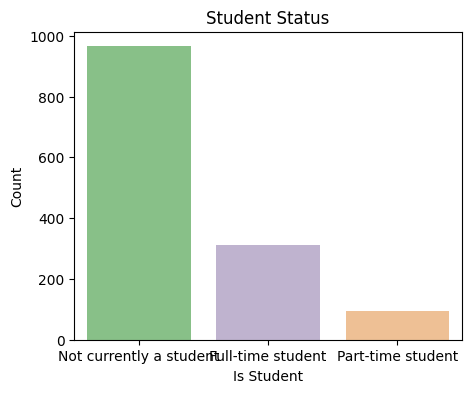

In [240]:
plt.figure(figsize=(5,4))
sns.countplot(data=light_df, x='student', palette="Accent")
plt.title("Student Status")
plt.xlabel("Is Student")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-1446392814.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


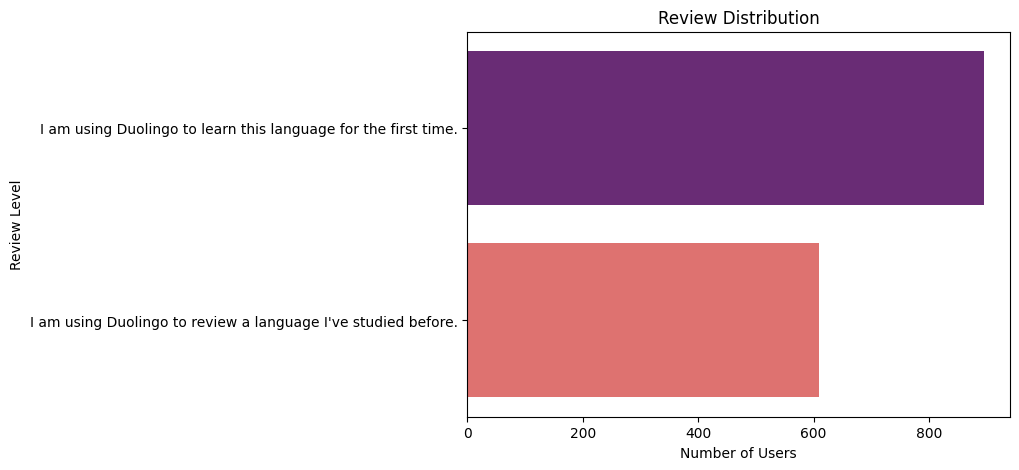

In [243]:
plt.figure(figsize=(7,5))
order = light_df['primary_language_review'].value_counts().index
sns.countplot(
    data=light_df,
    y='primary_language_review',
    order=order,
    palette="magma"
)
plt.title("Review Distribution")
plt.xlabel("Number of Users")
plt.ylabel("Review Level")
plt.show()

/tmp/ipython-input-3736388483.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


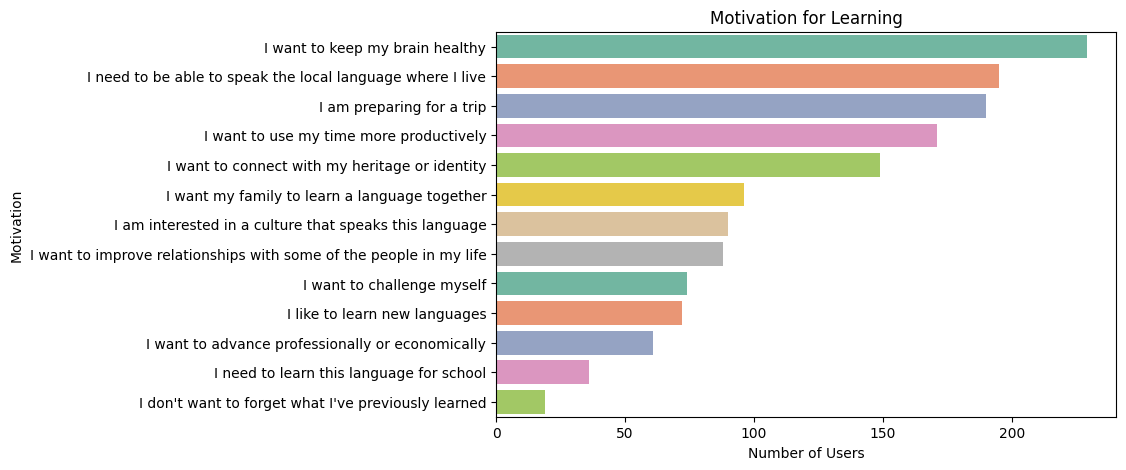

In [237]:
plt.figure(figsize=(8,5))
order = light_df['primary_language_motivation'].value_counts().index
sns.countplot(
    data=light_df,
    y='primary_language_motivation',
    order=order,
    palette="Set2"
)
plt.title("Motivation for Learning")
plt.xlabel("Number of Users")
plt.ylabel("Motivation")
plt.show()